<a href="https://colab.research.google.com/github/saylee206/AI-Based-Malaria-Parasite-Detection-Revolutionizing-Diagnosis-with-Intelligent-Technology.-/blob/main/NN_CA_3_CODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # or DecisionTreeRegressor
from sklearn import metrics
import warnings

In [ ]:
Data = pd.read_csv("/content/diabetes (1).csv")


In [ ]:
Data.describe()

,Pregnancies,Glucose,BloodPressure,Skinthickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df_check = Data.isnull().sum()
print (df_check)


Pregnancies                 0
Glucose                     0
BloodPressure               0
Skinthickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
X = pd.DataFrame(Data, columns=['Glucose','BloodPressure','Skinthickness','Insulin','BMI','DiabetesPedigreeFunction','Age'])
y = Data.Outcome.values.reshape(-1,1)
X

,Glucose,BloodPressure,Skinthickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,183,64,0,0,23.3,0.672,32
3,89,66,23,94,28.1,0.167,21
4,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63
764,122,70,27,0,36.8,0.340,27
765,121,72,23,112,26.2,0.245,30
766,126,60,0,0,30.1,0.349,47


In [ ]:


X_train, X_test, y_train , y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [ ]:
clf = DecisionTreeClassifier(max_depth=3) # Quality of the splite based on "gini" for the gini impurity
clf= clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [ ]:
print('Accuracy:', metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.7575757575757576


In [ ]:
from sklearn import tree

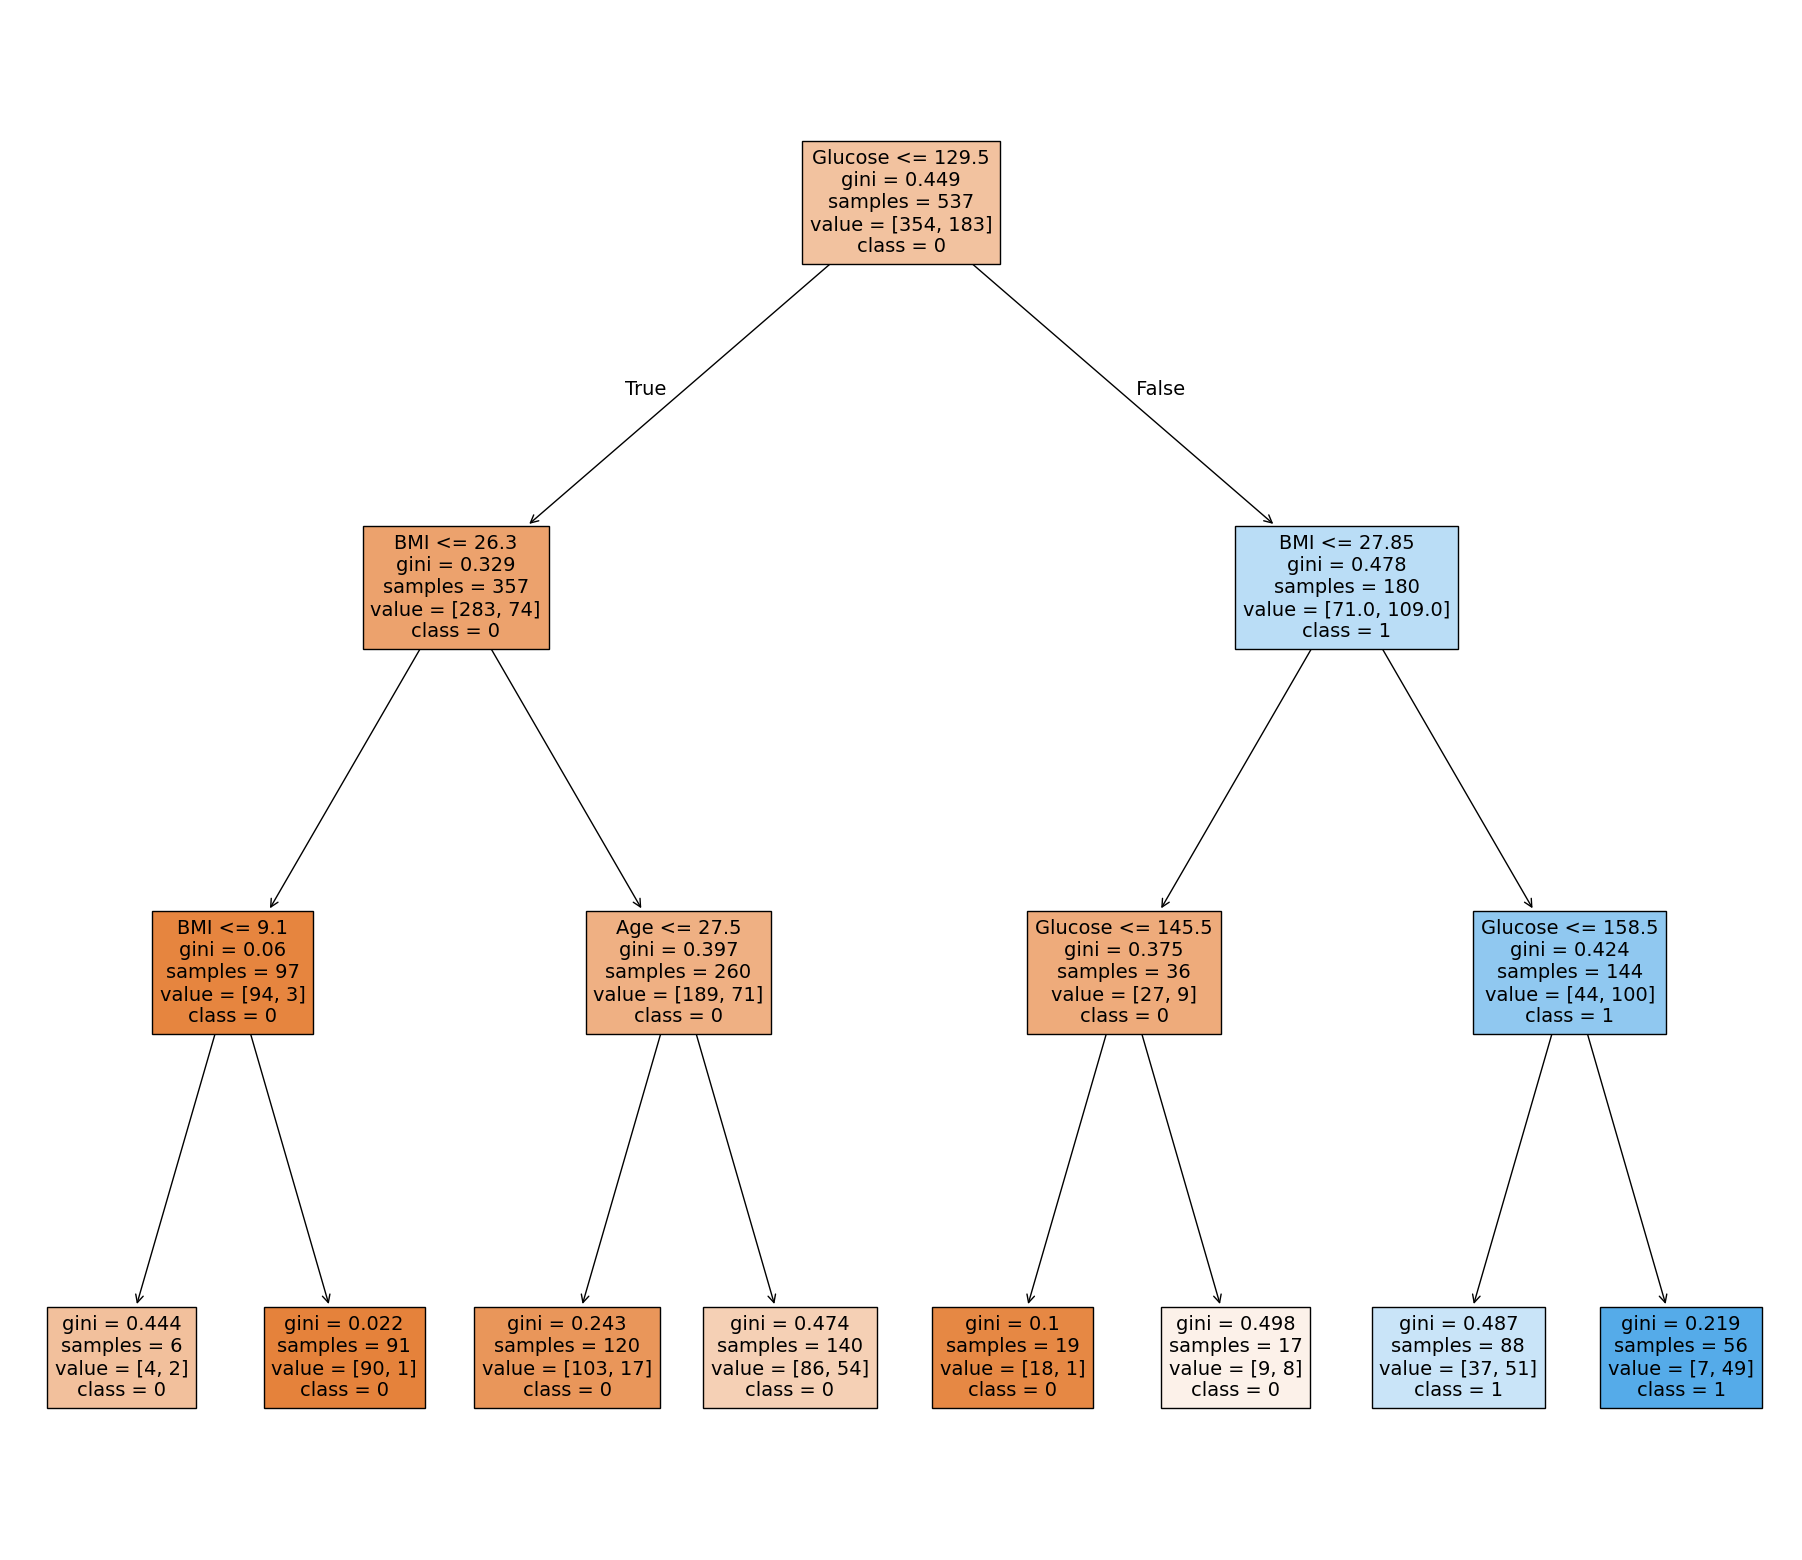

In [ ]:
feature_names = ['Glucose','BloodPressure','Skinthickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
target_names = ['0', '1']
fig= plt.figure(figsize=(23,20))
Plot = tree.plot_tree(clf,
                      feature_names= feature_names,
                      class_names = target_names,
                      filled = True)
fig.savefig('Tree1.png')

Training Accuracy: 0.7635009310986964
Test Accuracy: 0.7575757575757576


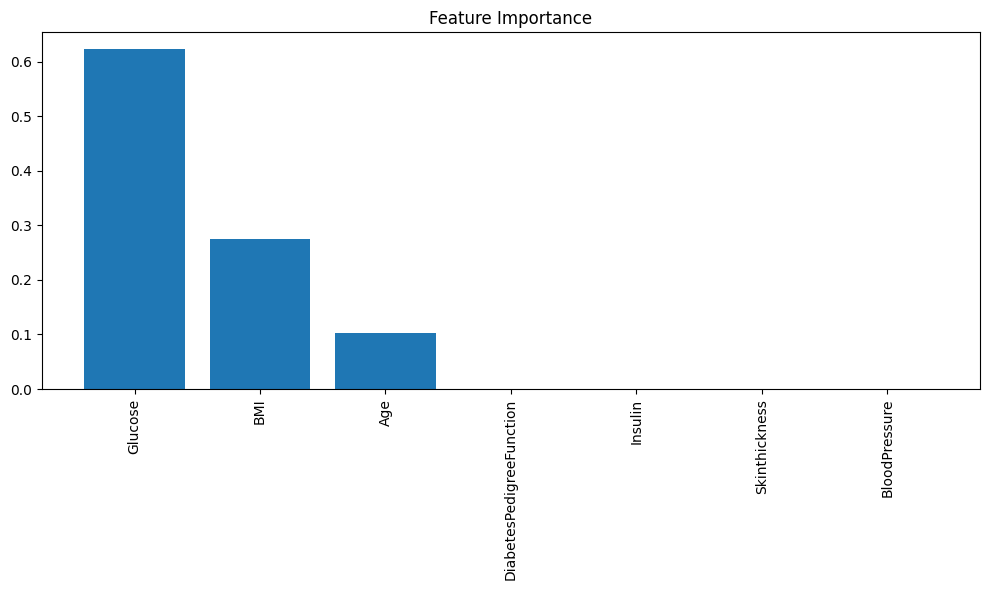

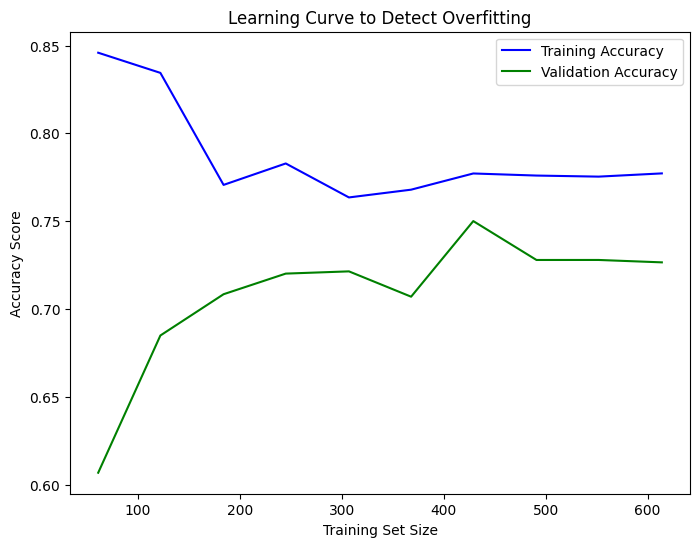

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.87      0.82       146
           1       0.72      0.56      0.63        85

    accuracy                           0.76       231
   macro avg       0.75      0.72      0.73       231
weighted avg       0.75      0.76      0.75       231



In [ ]:
# Import required libraries for interpretability and overfitting detection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# 1. Evaluate accuracy on both train and test sets
train_pred = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, train_pred)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

# 2. Check for overfitting: If the training accuracy is much higher than test accuracy, it indicates overfitting

# 3. Plot feature importance for interpretability
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10,6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

# 4. Plot learning curve to visualize overfitting
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(clf, X, y.ravel(), cv=5, scoring='accuracy', n_jobs=-1,
                                                        train_sizes=np.linspace(0.1, 1.0, 10), random_state=1)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, label="Training Accuracy", color="blue")
plt.plot(train_sizes, test_mean, label="Validation Accuracy", color="green")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.title("Learning Curve to Detect Overfitting")
plt.legend()
plt.show()

# 5. Classification report for better interpretability of the model's performance
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=target_names))


Training Accuracy: 1.0
Test Accuracy: 0.7965367965367965


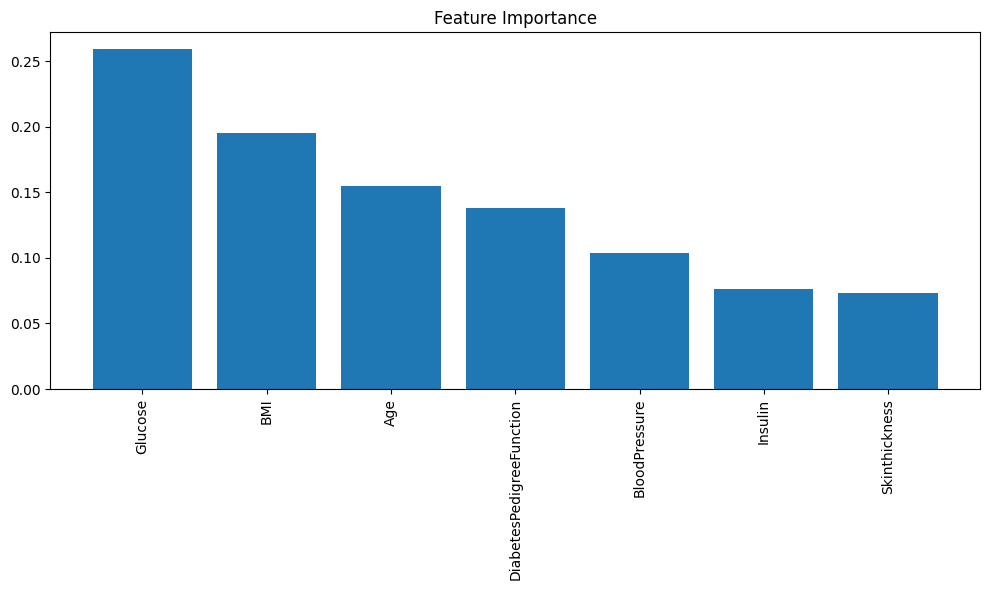

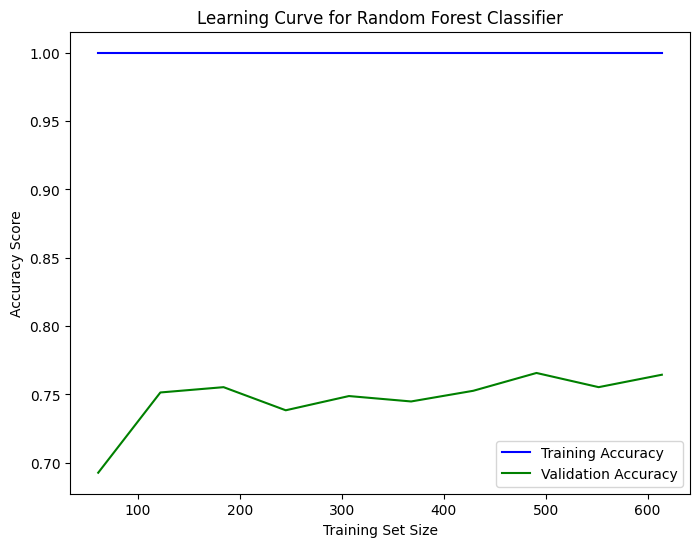

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.90      0.85       146
           1       0.79      0.61      0.69        85

    accuracy                           0.80       231
   macro avg       0.79      0.76      0.77       231
weighted avg       0.80      0.80      0.79       231



In [ ]:
#random forest
# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import learning_curve
from sklearn.metrics import classification_report

# Step 2: Load and prepare data
Data = pd.read_csv("/content/diabetes (1).csv")
X = pd.DataFrame(Data, columns=['Glucose', 'BloodPressure', 'Skinthickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
y = Data.Outcome.values.reshape(-1, 1)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Step 3: Train the Random Forest model
clf = RandomForestClassifier(n_estimators=100, random_state=1)
clf.fit(X_train, y_train.ravel())  # Flatten y_train to 1D array

# Step 4: Evaluate train and test accuracy
train_pred = clf.predict(X_train)
test_pred = clf.predict(X_test)

train_accuracy = metrics.accuracy_score(y_train, train_pred)
test_accuracy = metrics.accuracy_score(y_test, test_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

# Step 5: Feature importance
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

# Step 6: Plot learning curve
train_sizes, train_scores, test_scores = learning_curve(clf, X, y.ravel(), cv=5, scoring='accuracy', n_jobs=-1,
                                                        train_sizes=np.linspace(0.1, 1.0, 10), random_state=1)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Training Accuracy", color="blue")
plt.plot(train_sizes, test_mean, label="Validation Accuracy", color="green")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.title("Learning Curve for Random Forest Classifier")
plt.legend()
plt.show()

# Step 7: Classification report for better interpretability of the model's performance
print("Classification Report:\n", classification_report(y_test, test_pred, target_names=['0', '1']))
